# Spaceship Titanic Data Analysis and Engineering

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
sns.__version__

'0.12.2'

In [3]:
train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
PID = test_df.PassengerId
train_df['Transported'] = train_df['Transported'].astype(int)
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


## __PassengerId__

---

A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

---

In [4]:
train_df['Group'] = (train_df['PassengerId'].str.split('_', expand=True)[0])
counts = train_df['Group'].value_counts()
train_df['Alone'] = (train_df['Group'].map(counts) == 1).astype(int)
train_df.head(5)


test_df['Group'] = (test_df['PassengerId'].str.split('_', expand=True)[0])
counts = test_df['Group'].value_counts()
test_df['Alone'] = (test_df['Group'].map(counts) == 1).astype(int)

<Axes: xlabel='Alone', ylabel='count'>

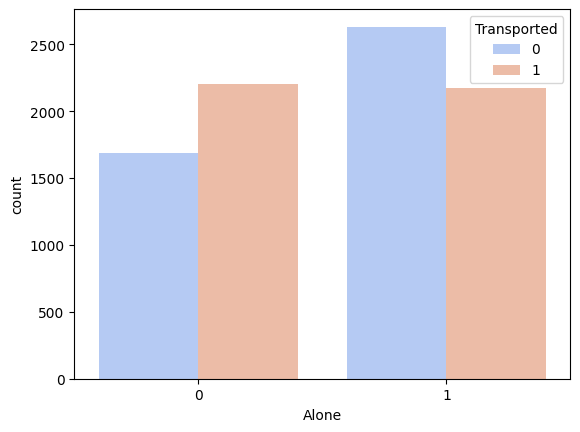

In [5]:
sns.countplot(x='Alone', data=train_df, hue='Transported', palette='coolwarm')

In [6]:
count_data = train_df.groupby(['Alone', 'Transported']).size().reset_index(name='count')
count_data

,Alone,Transported,count
0,0,0,1684
1,0,1,2204
2,1,0,2631
3,1,1,2174


In [7]:
total_family = 1684 + 2204
total_alone = 2631 + 2177

print(f'Precent of alone those survived  : {2174/total_alone}')
print(f'Precent of alone killed          : {2631/total_alone}')
print(f'Precent of family those survived : {2204/total_family}')
print(f'Precent of family killed         : {1684/total_family}')

Precent of alone those survived  : 0.4521630615640599
Precent of alone killed          : 0.5472129783693843
Precent of family those survived : 0.5668724279835391
Precent of family killed         : 0.4331275720164609


> *Being alone! lessens your survival rate*

## __HomePlanet__
---

The planet the passenger departed from, typically their planet of permanent residence.

---

In [8]:
print(train_df['HomePlanet'].unique())
print(train_df['HomePlanet'].value_counts())
print(train_df.HomePlanet.isna().sum())

['Europa' 'Earth' 'Mars' nan]
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
201


<Axes: xlabel='HomePlanet', ylabel='count'>

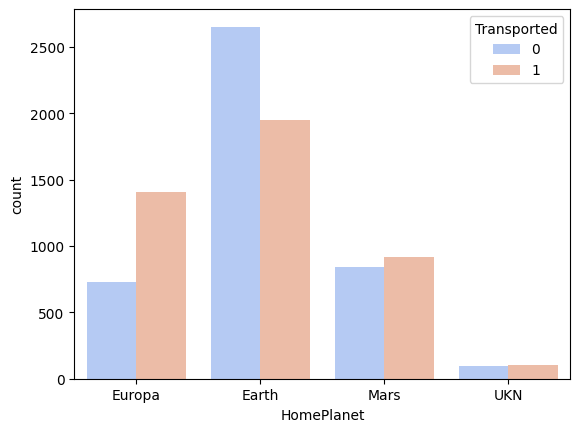

In [9]:
train_df['HomePlanet'] = train_df['HomePlanet'].fillna('UKN')
test_df['HomePlanet'] = test_df['HomePlanet'].fillna('UKN')
sns.countplot(data=train_df, x='HomePlanet', hue='Transported', palette='coolwarm')

In [10]:
train_df.groupby(['HomePlanet', 'Transported']).size().reset_index(name='count')

,HomePlanet,Transported,count
0,Earth,0,2651
1,Earth,1,1951
2,Europa,0,727
3,Europa,1,1404
4,Mars,0,839
5,Mars,1,920
6,UKN,0,98
7,UKN,1,103


## CryoSleep
---

Indicates whether the passenger elected to be put into suspended animation for the duration of the 
voyage. Passengers in cryosleep are confined to their cabins.

---

In [11]:
train_df.CryoSleep = train_df.CryoSleep.fillna(True)
test_df.CryoSleep = test_df.CryoSleep.fillna(True)

<Axes: xlabel='CryoSleep', ylabel='count'>

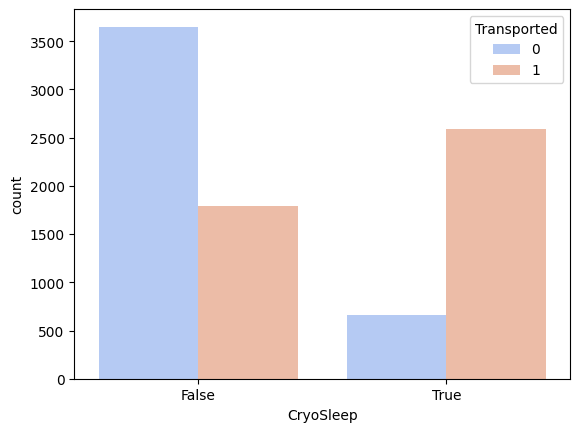

In [12]:
sns.countplot(data=train_df, x='CryoSleep', hue='Transported', palette='coolwarm')

In [13]:
train_df.groupby(['CryoSleep', 'Transported']).size().reset_index(name='count')

,CryoSleep,Transported,count
0,False,0,3650
1,False,1,1789
2,True,0,665
3,True,1,2589


| CryoSleep | Transported | count |
|-----------|-------------|-------|
| 0         | 0           | 3650  |
| 0         | 1           | 1789  |
| 1         | 0           | 554   |
| 1         | 1           | 2483  |


So, *81%* percent survived, those who were in the cryospleep

In [14]:
train_df.CryoSleep = train_df.CryoSleep.astype(int)
test_df.CryoSleep = test_df.CryoSleep.astype(int)

## Cabin
---

The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

---

In [15]:
train_df['Cabin'] = train_df['Cabin'].fillna('UKN/-1/UKN')
test_df['Cabin'] = test_df['Cabin'].fillna('UKN/-1/UKN')

In [16]:
train_df[['Deck', 'CNum', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
test_df[['Deck', 'CNum', 'Side']] = test_df['Cabin'].str.split('/', expand=True)
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Alone,Deck,CNum,Side
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,1,B,0,P
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,1,F,0,S
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,0,A,0,S
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,0,A,0,S
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,1,F,1,S


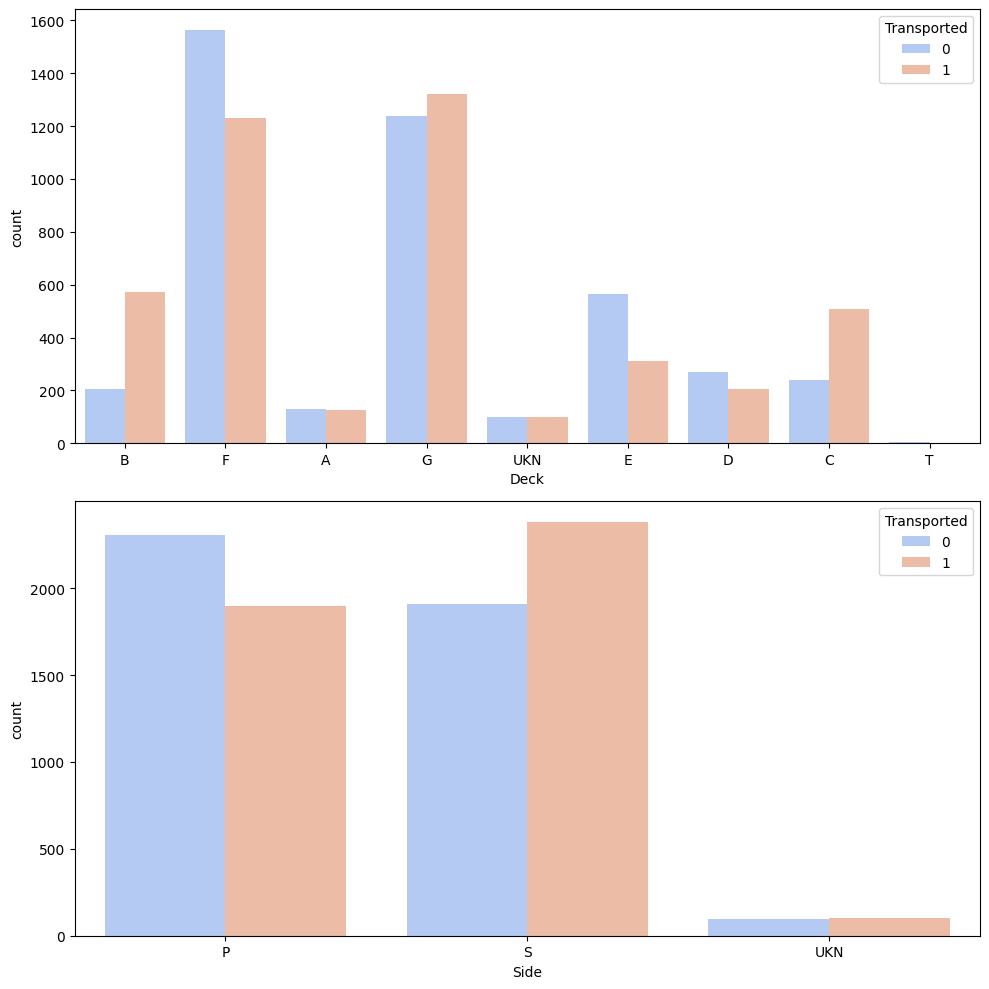

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

sns.countplot(data=train_df, x='Deck', hue='Transported', palette='coolwarm', ax=ax[0])
sns.countplot(data=train_df, x='Side', hue='Transported', palette='coolwarm', ax=ax[1])

plt.tight_layout()
plt.show()

In [18]:
deck = train_df.groupby(['Deck', 'Transported']).size().reset_index(name='count')
side = train_df.groupby(['Side', 'Transported']).size().reset_index(name='count')

| Side | Transported | count |
|------|-------------|-------|
| P    | 0           | 2308  |
| P    | 1           | 1898  |
| S    | 0           | 1908  |
| S    | 1           | 2380  |
| UKN  | 0           | 99    |
| UKN  | 1           | 100   |


Hmmm.... *"S"* side people survived more that the P ones

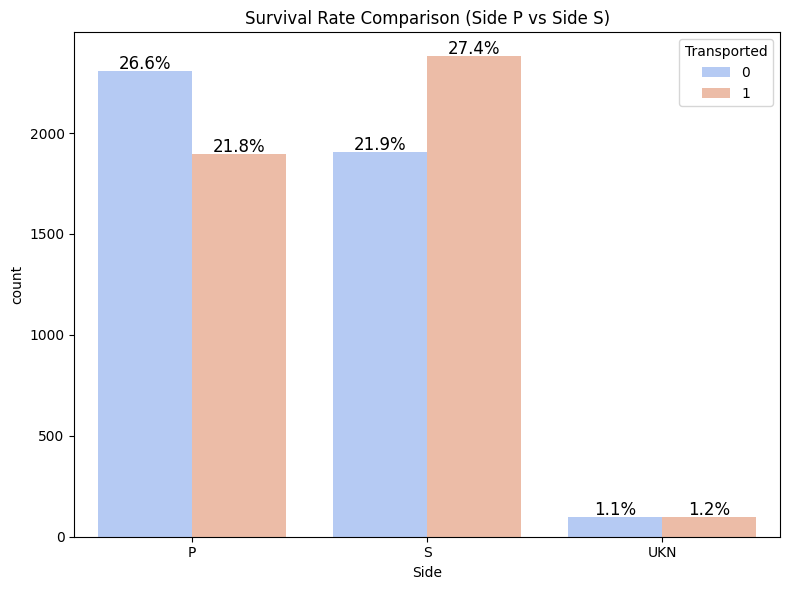

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='Side', y='count', hue='Transported', data=side, ax=ax, palette='coolwarm')

total = side['count'].sum()
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    percentage = height / total * 100
    ax.annotate(f'{percentage:.1f}%', (x, height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Survival Rate Comparison (Side P vs Side S)')
plt.tight_layout()
plt.show()

| Deck | Transported | count |
|------|-------------|-------|
| A    | 0           | 129   |
| A    | 1           | 127   |
| B    | 0           | 207   |
| B    | 1           | 572   |
| C    | 0           | 239   |
| C    | 1           | 508   |
| D    | 0           | 271   |
| D    | 1           | 207   |
| E    | 0           | 563   |
| E    | 1           | 313   |
| F    | 0           | 1565  |
| F    | 1           | 1229  |
| G    | 0           | 1238  |
| G    | 1           | 1321  |
| T    | 0           | 4     |
| T    | 1           | 1     |
| UKN  | 0           | 99    |
| UKN  | 1           | 100   |



__F__ survived the most

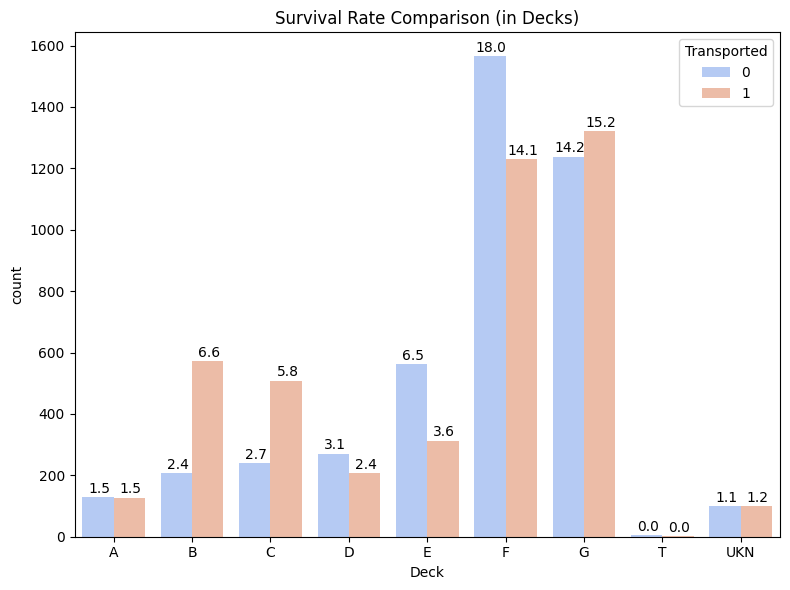

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='Deck', y='count', hue='Transported', data=deck, ax=ax, palette='coolwarm')

total = side['count'].sum()
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    percentage = height / total * 100
    ax.annotate(f'{percentage:.1f}', (x, height), ha='center', va='center', fontsize=10, color='black', xytext=(1, 6), textcoords='offset points')

plt.title('Survival Rate Comparison (in Decks)')
plt.tight_layout()
plt.show()

In [21]:
train_df['CNum'] = train_df['CNum'].astype(int)
test_df['CNum'] = test_df['CNum'].astype(int)

## Destination
---

The planet the passenger will be debarking to.

---

In [22]:
train_df.Destination = train_df['Destination'].fillna('UKN')
test_df.Destination = test_df['Destination'].fillna('UKN')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Alone,Deck,CNum,Side
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,1,B,0,P
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,1,F,0,S
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,0,A,0,S
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,0,A,0,S
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,1,F,1,S


In [23]:
dest = train_df.groupby(['Destination', 'Transported']).size().reset_index(name='count')

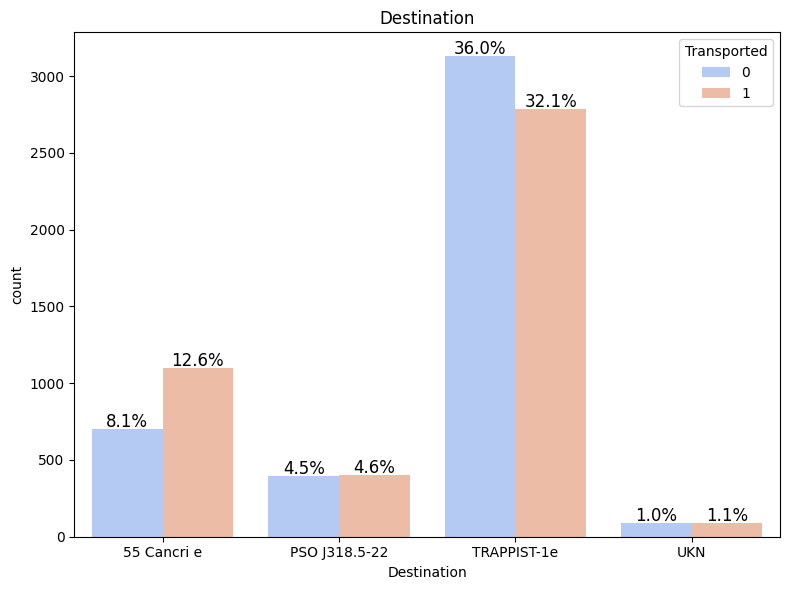

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='Destination', y='count', hue='Transported', data=dest, ax=ax, palette='coolwarm')

total = side['count'].sum()
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    percentage = height / total * 100
    ax.annotate(f'{percentage:.1f}%', (x, height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Destination')
plt.tight_layout()
plt.show()

## Age
---
The age of the passenger

---

In [25]:
mean = int(train_df.Age.mean())
train_df.Age = train_df.Age.fillna(mean)
test_df.Age = test_df.Age.fillna(mean)

<Axes: xlabel='Age', ylabel='Density'>

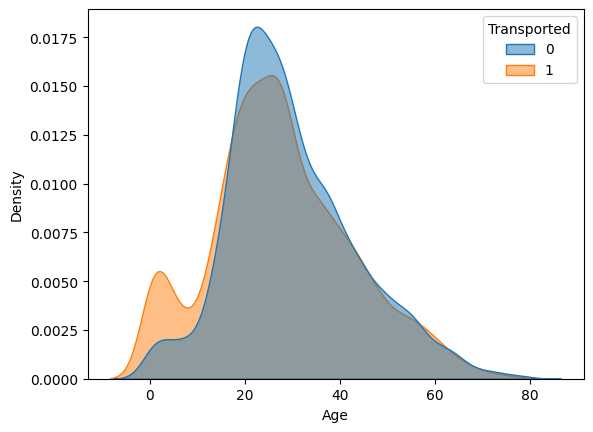

In [26]:
sns.kdeplot(data=train_df, x='Age', hue='Transported', fill=True, alpha=0.5)

Most of the population was at the young age. Lets dig a bit deeper

In [27]:
train_df.Age.describe()

count    8693.000000
mean       28.810882
std        14.339536
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

And how tf there is zero age

In [28]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
train_df['AgeGrouping'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)
test_df['AgeGrouping'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)

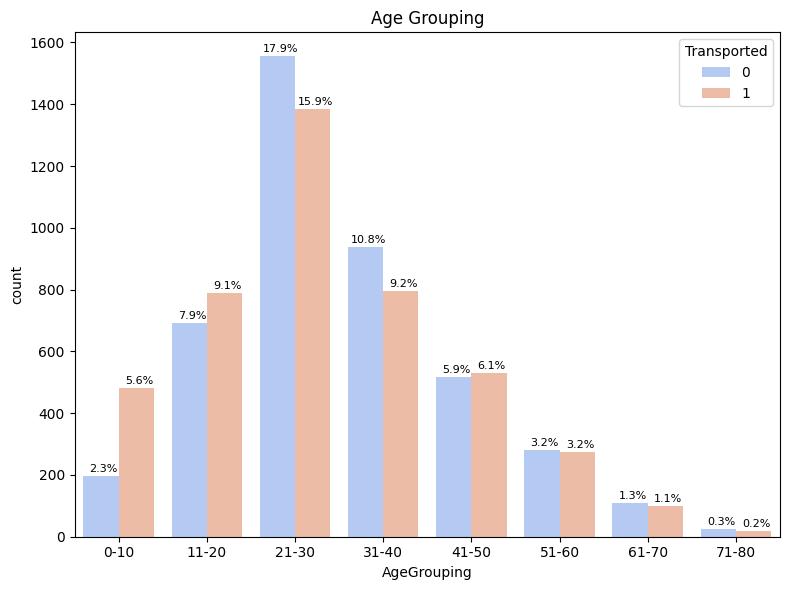

In [29]:
age_grouping_count = train_df.groupby(['AgeGrouping', 'Transported']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='AgeGrouping', y='count', hue='Transported', data=age_grouping_count, ax=ax, palette='coolwarm')

total = side['count'].sum()
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    percentage = height / total * 100
    ax.annotate(f'{percentage:.1f}%', (x, height), ha='center', va='center', fontsize=8, color='black', xytext=(2, 5), textcoords='offset points')

plt.title('Age Grouping')
plt.tight_layout()
plt.show()

## VIP
---

Whether the passenger has paid for special VIP service during the voyage.

---

<Axes: xlabel='VIP', ylabel='count'>

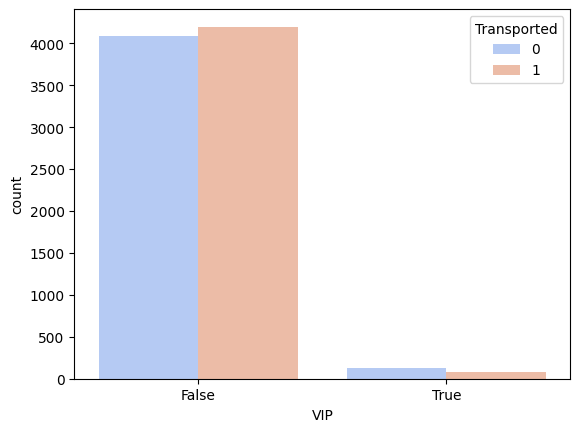

In [30]:
sns.countplot(data=train_df, hue="Transported",x="VIP", palette="coolwarm")

In [31]:
vip = train_df.groupby(['VIP', 'Transported']).size().reset_index(name='count')
vip

,VIP,Transported,count
0,False,0,4093
1,False,1,4198
2,True,0,123
3,True,1,76


SO paying more ain't gonna save u?

In [32]:
train_df.VIP = train_df.VIP.fillna(False)
test_df.VIP = test_df.VIP.fillna(False)

train_df.VIP = (train_df.VIP).astype(int)
test_df.VIP = (test_df.VIP).astype(int)

## RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
---

Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

---

In [33]:
exp = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df[exp] = train_df[exp].fillna(0)
test_df[exp] = test_df[exp].fillna(0)


train_df['TSpend'] = train_df[exp].sum(axis=1)
test_df['TSpend'] = test_df[exp].sum(axis=1)
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Group,Alone,Deck,CNum,Side,AgeGrouping,TSpend
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,...,0.0,Maham Ofracculy,0,0001,1,B,0,P,31-40,0.0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,...,44.0,Juanna Vines,1,0002,1,F,0,S,21-30,736.0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,...,49.0,Altark Susent,0,0003,0,A,0,S,51-60,10383.0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,...,193.0,Solam Susent,0,0003,0,A,0,S,31-40,5176.0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,...,2.0,Willy Santantines,1,0004,1,F,1,S,11-20,1091.0


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   object  
 2   CryoSleep     8693 non-null   int64   
 3   Cabin         8693 non-null   object  
 4   Destination   8693 non-null   object  
 5   Age           8693 non-null   float64 
 6   VIP           8693 non-null   int64   
 7   RoomService   8693 non-null   float64 
 8   FoodCourt     8693 non-null   float64 
 9   ShoppingMall  8693 non-null   float64 
 10  Spa           8693 non-null   float64 
 11  VRDeck        8693 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   int64   
 14  Group         8693 non-null   object  
 15  Alone         8693 non-null   int64   
 16  Deck          8693 non-null   object  
 17  CNum          8693 non-null   int64   
 18  Side    

In [35]:
sel_col_te = ['HomePlanet', 'CryoSleep', 'Destination', 
           'Age', 'VIP', 'RoomService', 'FoodCourt', 
           'ShoppingMall', 'Spa', 'VRDeck', 'Alone', 
           'Deck', 'CNum', 'Side', 'AgeGrouping',
           'Age', 'TSpend']

test_df = test_df[sel_col_te]
sel_col_tr = ['HomePlanet', 'CryoSleep', 'Destination', 
           'Age', 'VIP', 'RoomService', 'FoodCourt', 
           'ShoppingMall', 'Spa', 'VRDeck', 'Alone', 
           'Deck', 'CNum', 'Side', 'AgeGrouping',
           'Age', 'TSpend', 'Transported']
train_df = train_df[sel_col_tr]

In [36]:
test_df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Alone           0
Deck            0
CNum            0
Side            0
AgeGrouping     0
Age             0
TSpend          0
dtype: int64

In [37]:
train_df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Alone           0
Deck            0
CNum            0
Side            0
AgeGrouping     0
Age             0
TSpend          0
Transported     0
dtype: int64

In [38]:
cat_cols = train_df.select_dtypes(include=['object', 'category']).columns
cat_cols

Index(['HomePlanet', 'Destination', 'Deck', 'Side', 'AgeGrouping'], dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.fit_transform(test_df[col])    

# Importing Something

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier


from sklearn.metrics import accuracy_score, classification_report

# Model Selection

In [41]:
X = train_df.drop('Transported', axis=1)
y = train_df['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=42)

# Testing

## LogisticRegression

In [42]:
lor = LogisticRegression()

lor.fit(X_train, y_train)

print(classification_report(y_test, lor.predict(X_test)))
print(accuracy_score(y_test, lor.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      1289
           1       0.73      0.85      0.78      1319

    accuracy                           0.76      2608
   macro avg       0.77      0.76      0.76      2608
weighted avg       0.77      0.76      0.76      2608

0.7649539877300614


## Lienar SVM

In [43]:
lsvc = LinearSVC()

lsvc.fit(X_train, y_train)

print(classification_report(y_test, lsvc.predict(X_test)))
print(accuracy_score(y_test, lsvc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.26      0.37      1289
           1       0.55      0.87      0.67      1319

    accuracy                           0.57      2608
   macro avg       0.60      0.56      0.52      2608
weighted avg       0.60      0.57      0.52      2608

0.567101226993865


## SVC

In [44]:
svc = SVC()

svc.fit(X_train, y_train)

print(classification_report(y_test, svc.predict(X_test)))
print(accuracy_score(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      1289
           1       0.73      0.88      0.80      1319

    accuracy                           0.78      2608
   macro avg       0.79      0.78      0.78      2608
weighted avg       0.79      0.78      0.78      2608

0.7787576687116564


## DecisionTreeClassifier

In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

print(classification_report(y_test, dtc.predict(X_test)))
print(accuracy_score(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1289
           1       0.74      0.77      0.75      1319

    accuracy                           0.75      2608
   macro avg       0.75      0.75      0.75      2608
weighted avg       0.75      0.75      0.75      2608

0.7484662576687117


## ExtraTreesClassifier

In [46]:
etc = ExtraTreesClassifier()

etc.fit(X_train, y_train)

print(classification_report(y_test, etc.predict(X_test)))
print(accuracy_score(y_test, etc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1289
           1       0.81      0.76      0.78      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608

0.7898773006134969


## RandomForestClassifier

In [47]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

print(classification_report(y_test, rfc.predict(X_test)))
print(accuracy_score(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1289
           1       0.81      0.78      0.80      1319

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608

0.7975460122699386


## GradientBoostingClassifier

In [48]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

print(classification_report(y_test, gbc.predict(X_test)))
print(accuracy_score(y_test, gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1289
           1       0.77      0.84      0.80      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608

0.7921779141104295


# Choosing Model

| Model              | Accuracy | Precision (0) | Recall (0) | F1-score (0) | Precision (1) | Recall (1) | F1-score (1) | Macro Avg | Weighted Avg |
|--------------------|----------|---------------|------------|--------------|---------------|------------|--------------|-----------|--------------|
| GradientBoosting   | 0.7922   | 0.82          | 0.74       | 0.78         | 0.77          | 0.84       | 0.80         | 0.79      | 0.79         |
| RandomForest       | 0.7987   | 0.79          | 0.82       | 0.80         | 0.81          | 0.78       | 0.80         | 0.80      | 0.80         |
| ExtraTrees         | 0.7895   | 0.77          | 0.82       | 0.79         | 0.81          | 0.76       | 0.78         | 0.79      | 0.79         |
| DecisionTree (DTC) | 0.7500   | 0.76          | 0.73       | 0.74         | 0.75          | 0.77       | 0.76         | 0.75      | 0.75         |
| SVC                | 0.7788   | 0.85          | 0.67       | 0.75         | 0.73          | 0.88       | 0.80         | 0.79      | 0.78         |
| LinearSVC          | 0.7619   | 0.76          | 0.75       | 0.76         | 0.76          | 0.77       | 0.77         | 0.76      | 0.76         |
| LogisticRegression | 0.7649   | 0.81          | 0.68       | 0.74         | 0.73          | 0.85       | 0.78         | 0.77      | 0.76         |


So choosing **Random Forest** won't be a bad idea, as it has a good accuray and good f1 score and weighted avg

In [49]:
# rf = RandomForestClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=4, scoring='accuracy')
# grid_rf.fit(X_train, y_train)

# best_rf = grid_rf.best_estimator_

# pred = best_rf.predict(X_test)
# print(classification_report(y_test, pred))
# print(accuracy_score(y_test, pred))

Above code give u this result

### GridSearchCV Results

| Model              | Accuracy | Precision (0) | Recall (0) | F1-score (0) | Precision (1) | Recall (1) | F1-score (1) | Macro Avg | Weighted Avg |
|--------------------|----------|---------------|------------|--------------|---------------|------------|--------------|-----------|--------------|
| Random Forest (GridSearch) | 0.80     | 0.81          | 0.77       | 0.79         | 0.78          | 0.82       | 0.80         | 0.80      | 0.80         |

**Additional Results:**
- **Accuracy:** 0.80
- **Macro Avg:** 0.80
- **Weighted Avg:** 0.80


# Ending With the Random Forest

In [50]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=4, scoring='accuracy')
grid_rf.fit(X, y)

best_rf = grid_rf.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


# 😭 😭 😭 

In [51]:
pred = best_rf.predict(test_df).astype(bool)
pred

array([ True, False,  True, ...,  True,  True,  True])

In [52]:
output = pd.DataFrame({
    "PassengerId": PID,
    "Transported": pred
})

output.to_csv('submission.csv', index=False, columns=["PassengerId", "Transported"])
print("Submitted")

Submitted


# A Note

This code is based on my intuition and understanding of the concept. If you have any suggestions, I would truly appreciate them.  

I hope this provides you with some valuable insights. 😊  
